## Setup:

In [1]:
!git clone https://github.com/mat10d/EvolvePro.git
%cd EvolvePro/

Cloning into 'EvolvePro'...
remote: Enumerating objects: 1136, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 1136 (delta 58), reused 63 (delta 35), pack-reused 1041 (from 1)
Receiving objects: 100% (1136/1136), 65.24 MiB | 10.14 MiB/s, done.
Resolving deltas: 100% (626/626), done.
/content/EvolvePro


In [2]:
%%capture

!pip install pandas numpy scikit-learn scikit-learn-extra xgboost matplotlib seaborn biopython scipy torch fair-esm
!mkdir /content/output

## Process

In [3]:
from evolvepro.src.process import generate_wt, generate_single_aa_mutants
generate_wt('MAKEDNIEMQGTVLETLPNTMFRVELENGHVVTAHISGKMRKNYIRILTGDKVTVELTPYDLSKGRIVFRSR', output_file='/content/output/kelsic_WT.fasta')
generate_single_aa_mutants('/content/output/kelsic_WT.fasta', output_file='/content/output/kelsic.fasta')

Number of mutants: 1369


In [4]:
from evolvepro.src.process import suggest_initial_mutants
suggest_initial_mutants('/content/output/kelsic.fasta', num_mutants=12, random_seed=42)


Suggested 12 mutants for testing:
1. R23K
2. T58E
3. I36D
4. V31C
5. I7A
6. K3F
7. Q10P
8. G38E
9. E4M
10. D61W
11. E4Y
12. R23N


## PLM

In [5]:
!python evolvepro/plm/esm/extract.py esm1b_t33_650M_UR50S /content/output/kelsic.fasta /content/output/kelsic_esm1b_t33_650M_UR50S --toks_per_batch 512 --include mean --concatenate_dir /content/output

Downloading: "https://dl.fbaipublicfiles.com/fair-esm/models/esm1b_t33_650M_UR50S.pt" to /root/.cache/torch/hub/checkpoints/esm1b_t33_650M_UR50S.pt
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/regression/esm1b_t33_650M_UR50S-contact-regression.pt" to /root/.cache/torch/hub/checkpoints/esm1b_t33_650M_UR50S-contact-regression.pt
Read /content/output/kelsic.fasta with 1369 sequences
Processing 1 of 196 batches (7 sequences)
Device: cpu
Processing 2 of 196 batches (7 sequences)
Device: cpu
Processing 3 of 196 batches (7 sequences)
Device: cpu
Processing 4 of 196 batches (7 sequences)
Device: cpu
Processing 5 of 196 batches (7 sequences)
Device: cpu
Processing 6 of 196 batches (7 sequences)
Device: cpu
Processing 7 of 196 batches (7 sequences)
Device: cpu
Processing 8 of 196 batches (7 sequences)
Device: cpu
Processing 9 of 196 batches (7 sequences)
Device: cpu
Processing 10 of 196 batches (7 sequences)
Device: cpu
Processing 11 of 196 batches (7 sequences)
Device: cpu
Processing 1

## Run EVOLVEpro

In [6]:
from evolvepro.src.evolve import evolve_experimental

protein_name = 'kelsic'
embeddings_base_path = '/content/output'
embeddings_file_name = 'kelsic_esm1b_t33_650M_UR50S.csv'
round_base_path = '/content/EvolvePro/colab/rounds_data'
wt_fasta_path = "/content/output/kelsic_WT.fasta"
number_of_variants = 12
output_dir = '/content/output/'
rename_WT = False

#### Round 1

In [7]:
round_name = 'Round1'
round_file_names = ['kelsic_Round1.xlsx']

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing kelsic - Round1
Embeddings loaded: (1369, 1280)
Loaded experimental data for kelsic_Round1.xlsx: (12, 3)
iteration shape: (12, 2)
Labels shape: (1369, 5)
Embeddings and labels are aligned
(1357,)

Tested variants in this round: 12
168     R23K
190      K3F
376     D61W
379     V31C
407      E4M
533     I36D
556      I7A
750     G38E
939     Q10P
982     T58E
1110     E4Y
1176    R23N
Name: variant, dtype: object

Top 12 variants predicted by the model:
     variant    y_pred  y_actual  y_actual_scaled  y_actual_binary  \
1268     D5M  0.965897       NaN              NaN              NaN   
165      E4V  0.963452       NaN              NaN              NaN   
1305     E4H  0.962645       NaN              NaN              NaN   
662      E4L  0.959575       NaN              NaN              NaN   
574     S71C  0.958340       NaN              NaN              NaN   
265      E4N  0.958080       NaN              NaN              NaN   
72       E4Q  0.957438       NaN          

/content/EvolvePro/evolvepro/src/model.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


#### Round 2

In [8]:
round_name = 'Round2'
round_file_names = ['kelsic_Round1.xlsx', 'kelsic_Round2.xlsx']

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing kelsic - Round2
Embeddings loaded: (1369, 1280)
Loaded experimental data for kelsic_Round1.xlsx: (12, 3)
Loaded experimental data for kelsic_Round2.xlsx: (12, 3)
iteration shape: (24, 2)
Labels shape: (1369, 5)
Embeddings and labels are aligned
(1345,)

Tested variants in this round: 24
72       E4Q
165      E4V
168     R23K
190      K3F
265      E4N
366     T12C
376     D61W
379     V31C
407      E4M
533     I36D
556      I7A
567     T12M
574     S71C
637      E8Q
662      E4L
750     G38E
871      E4F
939     Q10P
982     T58E
1060     E8C
1110     E4Y
1176    R23N
1268     D5M
1305     E4H
Name: variant, dtype: object

Top 12 variants predicted by the model:
     variant    y_pred  y_actual  y_actual_scaled  y_actual_binary  \
668      E4I  0.981850       NaN              NaN              NaN   
773      D5L  0.981707       NaN              NaN              NaN   
26       D5V  0.981422       NaN              NaN              NaN   
1338     D5Y  0.978122       NaN       

/content/EvolvePro/evolvepro/src/model.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


#### Round 3

In [9]:
round_name = 'Round3'
round_file_names = ['kelsic_Round1.xlsx', 'kelsic_Round2.xlsx', 'kelsic_Round3.xlsx']

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing kelsic - Round3
Embeddings loaded: (1369, 1280)
Loaded experimental data for kelsic_Round1.xlsx: (12, 3)
Loaded experimental data for kelsic_Round2.xlsx: (12, 3)
Loaded experimental data for kelsic_Round3.xlsx: (12, 3)
iteration shape: (36, 2)
Labels shape: (1369, 5)
Embeddings and labels are aligned
(1333,)

Tested variants in this round: 36
5        D5N
26       D5V
72       E4Q
165      E4V
168     R23K
190      K3F
265      E4N
366     T12C
376     D61W
379     V31C
407      E4M
533     I36D
556      I7A
567     T12M
569      D5I
574     S71C
597     E25Q
637      E8Q
662      E4L
668      E4I
719      D5F
738      E4W
750     G38E
773      D5L
869      E4C
871      E4F
939     Q10P
974      D5C
982     T58E
1060     E8C
1110     E4Y
1176    R23N
1268     D5M
1305     E4H
1329     M1W
1338     D5Y
Name: variant, dtype: object

Top 12 variants predicted by the model:
     variant    y_pred  y_actual  y_actual_scaled  y_actual_binary  \
431     E27Q  0.964743       NaN    

/content/EvolvePro/evolvepro/src/model.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


#### Round 4

In [10]:
round_name = 'Round4'
round_file_names = ['kelsic_Round1.xlsx', 'kelsic_Round2.xlsx', 'kelsic_Round3.xlsx', 'kelsic_Round4.xlsx']

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing kelsic - Round4
Embeddings loaded: (1369, 1280)
Loaded experimental data for kelsic_Round1.xlsx: (12, 3)
Loaded experimental data for kelsic_Round2.xlsx: (12, 3)
Loaded experimental data for kelsic_Round3.xlsx: (12, 3)
Loaded experimental data for kelsic_Round4.xlsx: (12, 3)
iteration shape: (48, 2)
Labels shape: (1369, 5)
Embeddings and labels are aligned
(1321,)

Tested variants in this round: 48
5        D5N
26       D5V
54      M21L
72       E4Q
74       E4T
78       D5S
165      E4V
168     R23K
190      K3F
199      D5T
265      E4N
314      D5H
366     T12C
376     D61W
379     V31C
407      E4M
431     E27Q
533     I36D
556      I7A
567     T12M
569      D5I
574     S71C
587     E27M
597     E25Q
637      E8Q
662      E4L
668      E4I
719      D5F
738      E4W
750     G38E
773      D5L
819     E27L
869      E4C
871      E4F
883     E27C
939     Q10P
974      D5C
982     T58E
1060     E8C
1110     E4Y
1134     D5A
1176    R23N
1216     D5Q
1268     D5M
1305     E4H
13

/content/EvolvePro/evolvepro/src/model.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


#### Round 5

In [11]:
round_name = 'Round5'
round_file_names = ['kelsic_Round1.xlsx', 'kelsic_Round2.xlsx', 'kelsic_Round3.xlsx', 'kelsic_Round4.xlsx', 'kelsic_Round5.xlsx']

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing kelsic - Round5
Embeddings loaded: (1369, 1280)
Loaded experimental data for kelsic_Round1.xlsx: (12, 3)
Loaded experimental data for kelsic_Round2.xlsx: (12, 3)
Loaded experimental data for kelsic_Round3.xlsx: (12, 3)
Loaded experimental data for kelsic_Round4.xlsx: (12, 3)
Loaded experimental data for kelsic_Round5.xlsx: (12, 3)
iteration shape: (60, 2)
Labels shape: (1369, 5)
Embeddings and labels are aligned
(1309,)

Tested variants in this round: 60
5        D5N
26       D5V
54      M21L
72       E4Q
74       E4T
78       D5S
120      E4S
165      E4V
168     R23K
190      K3F
199      D5T
219      D5P
265      E4N
267      E8H
314      D5H
366     T12C
371      D5W
376     D61W
377     Q10H
379     V31C
407      E4M
431     E27Q
435     S71K
533     I36D
556      I7A
567     T12M
569      D5I
574     S71C
587     E27M
597     E25Q
606      E4A
637      E8Q
662      E4L
668      E4I
719      D5F
727      E8K
738      E4W
750     G38E
773      D5L
819     E27L
869      E

/content/EvolvePro/evolvepro/src/model.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


## Plot

In [12]:
from evolvepro.src.plot import read_exp_data, plot_variants_by_iteration

round_base_path = '/content/EvolvePro/colab/rounds_data'
round_file_names = ['kelsic_Round1.xlsx', 'kelsic_Round2.xlsx', 'kelsic_Round3.xlsx', 'kelsic_Round4.xlsx', 'kelsic_Round5.xlsx']
wt_fasta_path = "/content/output/kelsic_WT.fasta"

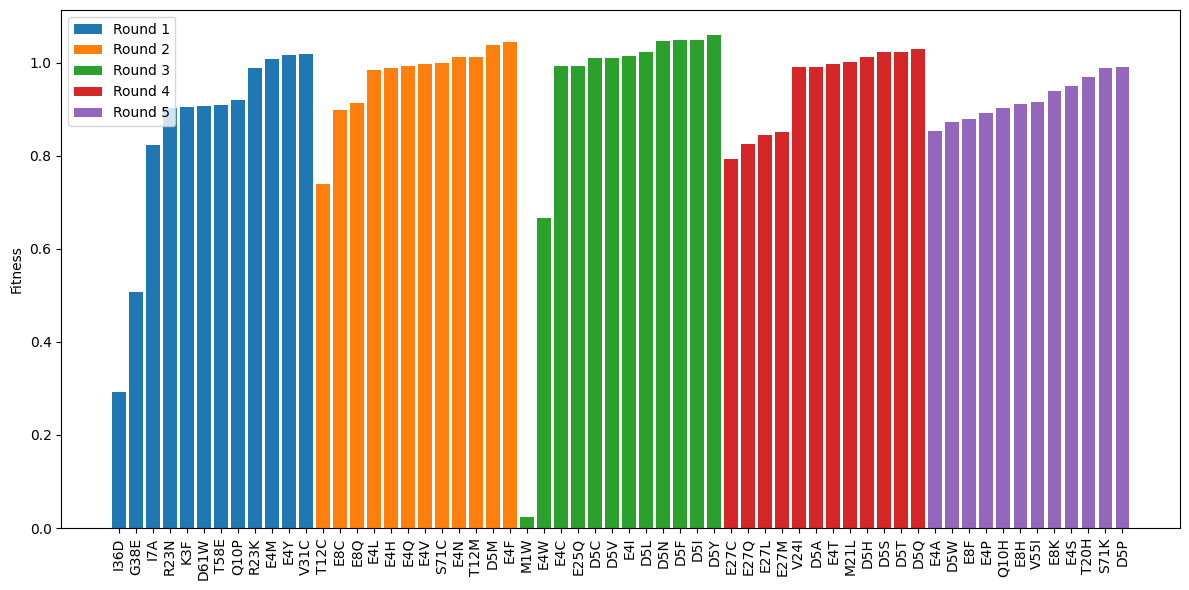

In [13]:
df = read_exp_data(round_base_path, round_file_names, wt_fasta_path)
plot_variants_by_iteration(df, fitness_column='fitness', output_dir=output_dir, output_file="kelsic")
